In [53]:
#note that the here used λ is in fact λ/(1+λ) in the derivation

using Roots #for solving unidimensional equation
using Cubature #for multidimesnional integral

const c = .25

# Monte Carlo Integration of function f on [0,1]^I
function MCInt(f,I)
    tries = Array{Float64}(1000000)
    for i in 1:1000000
        x = rand(I)
        tries[i]=f(x)
    end
    return mean(tries)
end

function xstar(θ,λ)
    I = length(θ)
    if sum(θ)-c*I-λ*(I-sum(θ))>=0
        return 1.0
    else
        return 0.0
    end
end

function budgetConstraint(λ,I)
    # return hcubature(θ->xstar(θ,λ)*(2*sum(θ)-I-c*I), zeros(I), ones(I);maxevals=1000000,abstol=1e-6,reltol=1e-6)[1]
    return MCInt(θ->xstar(θ,λ)*(2*sum(θ)-I-c*I), I)
end

function lambdaStar(I)
    fzero(λ->budgetConstraint(λ,I),[0.0,1.0])
end

function probPublicGood(I,λ)
    # return hcubature(θ->xstar(θ,λ), zeros(I), ones(I);maxevals=1000000,abstol=1e-6,reltol=1e-6)[1]
    return MCInt(θ->xstar(θ,λ), I)
end

function xFirstBest(θ)
    I = length(θ)
    if sum(θ)-c*I>=0
        return 1.0
    else
        return 0.0
    end
end

function probFirstBest(I)
    #return hcubature(θ->xFirstBest(θ), zeros(I), ones(I);maxevals=1000000,abstol=1e-6,reltol=1e-6)[1]
    return MCInt(xFirstBest,I)
end

for I = 2:10
    lambdastar=lambdaStar(I)
    println("for I=$I, λ* is ", round(lambdastar,2), " and prob x*=1  is ",round(probPublicGood(I,lambdastar),2)," while prob xfb=1 is ",round(probFirstBest(I),2))
end

for I=2, λ* is 0.31 and prob x*=1  is 0.63 while prob xfb=1 is 0.88
for I=3, λ* is 0.45 and prob x*=1  is 0.54 while prob xfb=1 is 0.93
for I=4, λ* is 0.54 and prob x*=1  is 0.46 while prob xfb=1 is 0.96
for I=5, λ* is 0.6 and prob x*=1  is 0.4 while prob xfb=1 is 0.97
for I=6, λ* is 0.65 and prob x*=1  is 0.35 while prob xfb=1 is 0.98
for I=7, λ* is 0.69 and prob x*=1  is 0.31 while prob xfb=1 is 0.99
for I=8, λ* is 0.72 and prob x*=1  is 0.27 while prob xfb=1 is 0.99
for I=9, λ* is 0.74 and prob x*=1  is 0.24 while prob xfb=1 is 1.0
for I=10, λ* is 0.76 and prob x*=1  is 0.21 while prob xfb=1 is 1.0


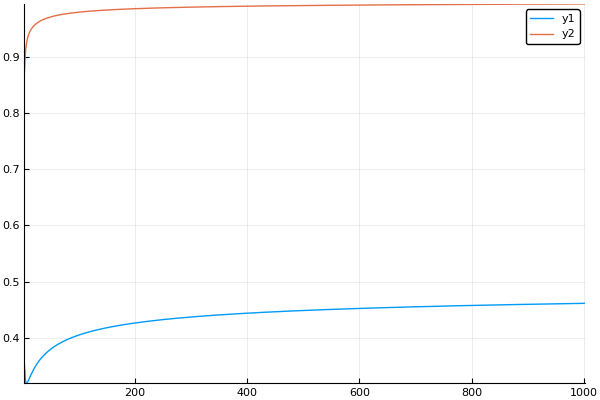

In [2]:
# solution to exercise
using Plots
using Distributions
using Roots
const c = 1.25
function thetastar(I)
    return find_zero(s->I*pdf(Binomial(I,s),I/2)-c,(0.0,0.5),Bisection())
end

eqCutoffs = Array{Float64}(500)
eqX = Array{Float64}(500)
for Ihalf in 2:501
    cutoff = thetastar(Ihalf*2)
    eqCutoffs[Ihalf-1]=cutoff
    eqX[Ihalf-1]=1.0-cdf(Binomial(Ihalf*2,1-cutoff),Ihalf-1)
end

#println(eqCutoffs,eqX)
backend(:pyplot)
plot(4:2:1002,[eqCutoffs,eqX])

In [7]:
#OPtimal mechanism if costs are fixed independently of I
#note that the here used λ is in fact λ/(1+λ) in the derivation

using Roots #for solving unidimensional equation
using Cubature #for multidimesnional integral

const c = 1.25

# Monte Carlo Integration of function f on [0,1]^I
function MCInt(f,I)
    tries = Array{Float64}(1000000)
    for i in 1:1000000
        x = rand(I)
        tries[i]=f(x)
    end
    return mean(tries)
end

function xstar(θ,λ)
    I = length(θ)
    if sum(θ)-c-λ*(I-sum(θ))>=0
        return 1.0
    else
        return 0.0
    end
end

function budgetConstraint(λ,I)
    # return hcubature(θ->xstar(θ,λ)*(2*sum(θ)-I-c*I), zeros(I), ones(I);maxevals=1000000,abstol=1e-6,reltol=1e-6)[1]
    return MCInt(θ->xstar(θ,λ)*(2*sum(θ)-I-c), I)
end

function lambdaStar(I)
    fzero(λ->budgetConstraint(λ,I),[0.0,1.0])
end

function probPublicGood(I,λ)
    # return hcubature(θ->xstar(θ,λ), zeros(I), ones(I);maxevals=1000000,abstol=1e-6,reltol=1e-6)[1]
    return MCInt(θ->xstar(θ,λ), I)
end

function xFirstBest(θ)
    I = length(θ)
    if sum(θ)-c>=0
        return 1.0
    else
        return 0.0
    end
end

function probFirstBest(I)
    #return hcubature(θ->xFirstBest(θ), zeros(I), ones(I);maxevals=1000000,abstol=1e-6,reltol=1e-6)[1]
    return MCInt(xFirstBest,I)
end

for I = 2:10
    lambdastar=lambdaStar(I)
    println("for I=$I, λ* is ", round(lambdastar,2), " and prob x*=1  is ",round(probPublicGood(I,lambdastar),2)," while prob xfb=1 is ",round(probFirstBest(I),2))
end

for I=2, λ* is 0.33 and prob x*=1  is 0.16 while prob xfb=1 is 0.28
for I=3, λ* is 0.5 and prob x*=1  is 0.26 while prob xfb=1 is 0.68
for I=4, λ* is 0.56 and prob x*=1  is 0.34 while prob xfb=1 is 0.9
for I=5, λ* is 0.6 and prob x*=1  is 0.4 while prob xfb=1 is 0.97
for I=6, λ* is 0.63 and prob x*=1  is 0.45 while prob xfb=1 is 0.99
for I=7, λ* is 0.65 and prob x*=1  is 0.49 while prob xfb=1 is 1.0
for I=8, λ* is 0.67 and prob x*=1  is 0.52 while prob xfb=1 is 1.0
for I=9, λ* is 0.68 and prob x*=1  is 0.55 while prob xfb=1 is 1.0
for I=10, λ* is 0.69 and prob x*=1  is 0.58 while prob xfb=1 is 1.0
